# XML gaze data to pandas data and figures

## Import XML to dict

In [3]:
#additional helpful source:
#http://docs.python-guide.org/en/latest/scenarios/xml/

import xmltodict
import pandas as pd
import time

In [4]:
filepath = 'data_1_24_2018_11_25_05_AM_corrected.xml'

In [5]:
def xml_to_dict(filepath):
    with open(filepath) as fd:
        myxml = xmltodict.parse(fd.read())
    
    return myxml

In [11]:
start = time.time()
koe = xml_to_dict('data_1_24_2018_11_25_05_AM_corrected.xml')
end = time.time()
print(end - start), ' seconds'

10.9129998684  seconds


## Dict to pandas

In [73]:
'''Read attributes to pandas format'''
def read_to_pandas(myxml, session):
   

    hx = [i['@GazePointUnity'][1:-2].split(",")[0] for i in myxml['Data']['GazePointCombined']]
    hy = [i['@GazePointUnity'][1:-2].split(",")[1] for i in myxml['Data']['GazePointCombined']]
    hz = [i['@GazePointUnity'][1:-2].split(",")[2] for i in myxml['Data']['GazePointCombined']]
    hs = [i['@stage'] for i in myxml['Data']['StageType']] 
    ht = [i['@type'] for i in myxml['Data']['StageType']] 
    hse = [session for i in myxml['Data']['StageType']]

    mylist = zip (hx, hy, hz, hs, ht, hse)
    
    return pd.DataFrame(mylist, columns=['gpu_x','gpu_y','gpu_z','stage','type', 'session'])
    

In [74]:
filea = '../../ETRAdata/FixedETRAdata/data_1_24_2018_1_11_41_PM.xml'
fileb = '../../ETRAdata/FixedETRAdata/data_1_24_2018_1_18_25_PM.xml'

start = time.time()

dfa = read_to_pandas(xml_to_dict(filea), 1) #read file
dfb = read_to_pandas(xml_to_dict(fileb), 2)
df = pd.concat([dfa, dfb]) #combine dataframes

end = time.time()
print(end - start), ' seconds'

24.9620001316  seconds


In [75]:
df.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,1
1,0000.00000000,0000.00000000,-0000.7800000,0,2,1


In [76]:
df.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
29874,0015.06604000,-0023.37619000,-0055.7039800,4,2,2
29875,0013.38861000,-0020.97375000,-0046.6840800,4,2,2


In [77]:
dfa.head()

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,1
1,0000.00000000,0000.00000000,-0000.7800000,0,2,1
2,0000.00000000,0000.00000000,-0000.7800000,0,2,1
3,0000.00000000,0000.00000000,-0000.7800000,0,2,1
4,0000.00000000,0000.00000000,-0000.7800000,0,2,1


In [78]:
dfb.head()

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,2
1,0000.00000000,0000.00000000,-0000.7800000,0,2,2
2,0000.00000000,0000.00000000,-0000.7800000,0,2,2
3,0000.00000000,0000.00000000,-0000.7800000,0,2,2
4,0000.00000000,0000.00000000,-0000.7800000,0,2,2


In [79]:
dfa.tail()

,gpu_x,gpu_y,gpu_z,stage,type,session
30047,0000.67608060,0000.89934290,-0022.5973200,4,2,1
30048,0000.86685650,0001.02102800,-0022.5986900,4,2,1
30049,0000.75974550,0000.99598820,-0022.5972500,4,2,1
30050,0000.65789940,0000.80435240,-0022.5984800,4,2,1
30051,0000.51535710,0000.72171380,-0022.5973200,4,2,1


In [80]:
dfb.tail()

,gpu_x,gpu_y,gpu_z,stage,type,session
29871,0014.83124000,-0022.84897000,-0053.5350300,4,2,2
29872,0014.94470000,-0023.07329000,-0054.4687500,4,2,2
29873,0015.06604000,-0023.37619000,-0055.7039800,4,2,2
29874,0015.06604000,-0023.37619000,-0055.7039800,4,2,2
29875,0013.38861000,-0020.97375000,-0046.6840800,4,2,2


In [81]:
'''Check the length and data format'''
len(dfa), len(dfb), len(df), type(df.gpu_x[0])

(30052, 29876, 59928, pandas.core.series.Series)

## Data massage

In [94]:
'''Remove extra white space and cpnvert to float format'''
cols = ['gpu_x', 'gpu_y', 'gpu_z', 'stage', 'type', 'session']
df[cols] = df[cols].replace(' ','').astype(float)

In [95]:
'''Normed z value: inverse of (min-max scaling + .1)
.1 added to avoid 0'''
norm = lambda x: 1/(((x - x.min()) / (x.max()-x.min()))+.1)
df['gpu_nz'] = df['gpu_z'].transform(norm)

In [96]:
df['gpu_nz'].min(), df['gpu_nz'].max()

(0.90909090909090906, 10.0)

## Figures

In [97]:
import seaborn as sns
sns.set(style="white", color_codes=True)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

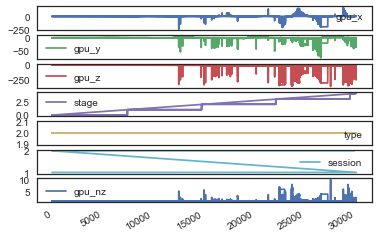

In [98]:
'''Just out of curiosity'''
df.plot(subplots=True);

### Plot x and y

In [99]:
#import seaborn as sns
import matplotlib.cm as cm

#### All-in-one

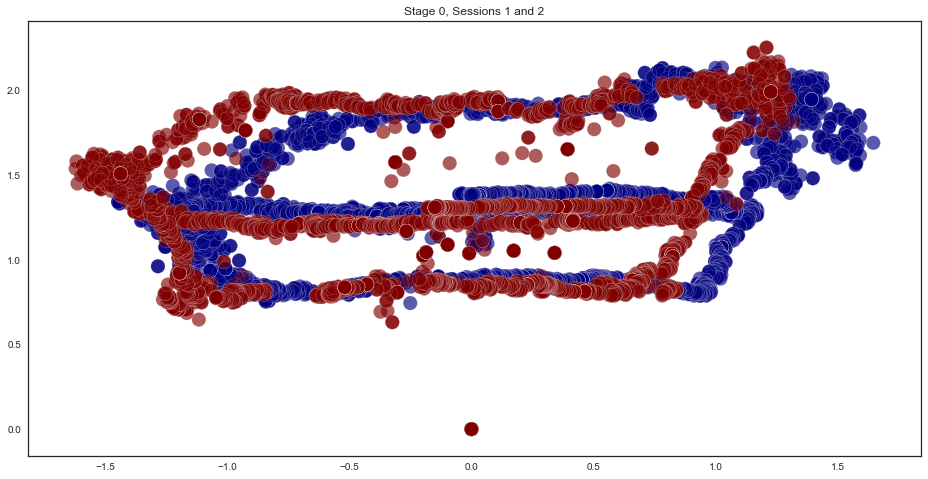

In [109]:
data = df[df.stage==0]
myzip = df.session.unique()
#colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color in zip(myzip, colors):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.4, c=data['session'], edgecolors='w', s=200, cmap='jet')
 
plt.title('Stage 0, Sessions 1 and 2');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);

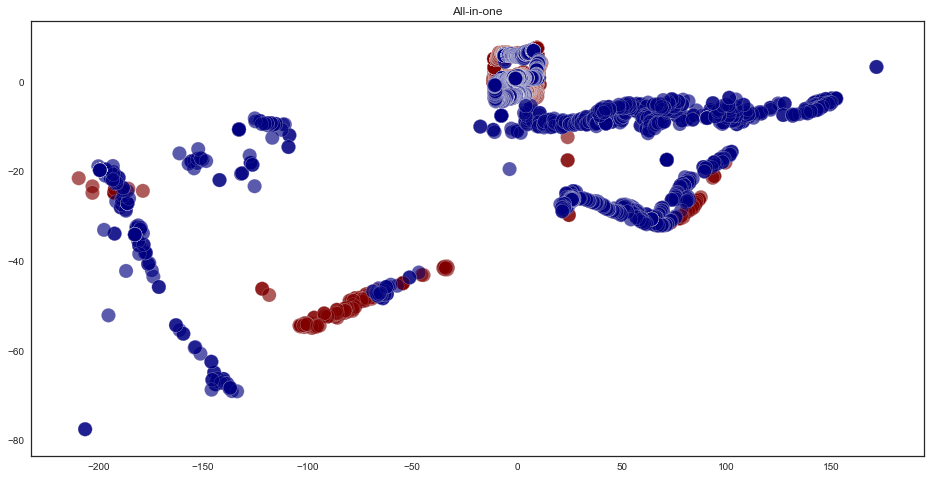

In [106]:
data = df[df.stage==3]
myzip = df.session.unique()
colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color in zip(myzip, colors):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.4, c=data['session'], edgecolors='w', s=200, cmap='jet_r')
 
plt.title('Stage 3, Sessions 1 and 2');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);

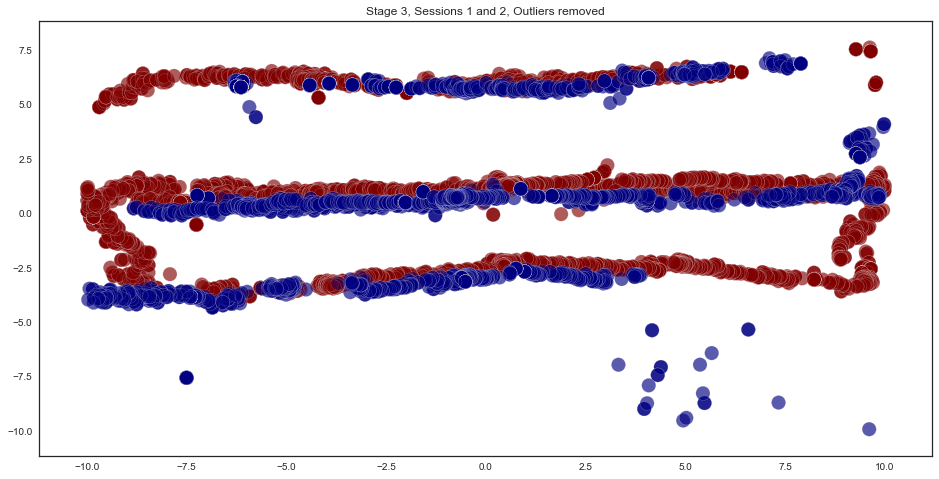

In [113]:
n = 10
data = df[df.stage==3]
data = data[((data.gpu_x<n)&(data.gpu_x>-n))&((data.gpu_y<n)&(data.gpu_y>-n))]
myzip = df.session.unique()
colors = ("green", "blue", 'red')
 
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
 
for dat, color in zip(myzip, colors):
    x = data['gpu_x']
    y = data['gpu_y']
    ax.scatter(x, y, alpha=0.4, c=data['session'], edgecolors='w', s=200, cmap='jet_r')
 
plt.title('Stage 3, Sessions 1 and 2, Outliers removed');
# plt.legend(loc=1)
#plt.savefig('all_in_one.png', format='png', dpi=300);